In [1]:
import numpy as np
import pandas as pd
import linearsolve as ls
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rcParams['figure.facecolor'] = 'white'

# Homework 6

**Instructions:** Complete the notebook below. Download the completed notebook in HTML format. Upload assignment using Canvas.

## Exercise: Four-Period Cake-Eating Problem

Now consider a the four-period cake-eating problem. A person has an initial quantity of cake $K_0>0$ and receives utility from consuming cake in period 0, period 1, period 2, and period 3:

\begin{align}
U(C_0,C_1,C_2,C_3) & = \log C_0 + \beta \log C_1+ \beta^2 \log C_2 + \beta^3 \log C_3.
\end{align}

The person chooses how much to consume in each period, $C_0$, $C_1$, $C_2$, $C_3$, and quantities of cake $K_1$, $K_2$, and $K_3$ to carry foward from period 0, period 1, and period 2 to maximize her utility subject to the following two budget constraints:

\begin{align}
C_0 + K_1 & = K_0\\
C_1 + K_2 & = K_1\\
C_2 + K_3 & = K_2\\
C_3 & = K_3,
\end{align}

where the boundary condition $K_4 = 0$ has been imposed.

### Part (a)

Find the first-order conditions with respect to $K_1$, $K_2$, and $K_3$ for the four-period cake-eating problem. Then solve by hand for:

1. $K_3$ as a function of $K_2$
1. $K_2$ as a function of $K_1$
2. $K_1$ as a function of $K_0$

Use what you derive in this part to do **Part (b)**, **Part (c)**, and **Part (d)**.

### Part (b)

Suppose that the initial quantity of cake is $K_0 = 100$. For $\beta = 0, 0.25, 0.5, 0.75, 0.99, 1, 2$, plot the optimal path for the quantity of cake for periods 0 through 4. Add labels to the plot command so you know which line corresponds to which value of $\beta$.

In [2]:
# Define a function to compute the solution for the four-period cake-eating problem. CELL NOT PROVIDED
def four_period_cake(beta,cake0):
    
    '''Function for computing solution to four-period cake-eating problem
    
            Args:
            beta (float):   subjective discount factor
            cake0 (float):  initial quantity of cake
            
        Returns:
            numpy array, numpy array
    '''
    
    # Initialize arrays for cake and consumption. NOT PROVIDED
    cake = np.zeros(5)
    consumption = np.zeros(4)
    
    # Assign values to cake array elements. NOT PROVIDED
    cake[0] = cake0
    cake[1] = (beta+beta**2+beta**3)/(1+beta+beta**2+beta**3)*cake[0]
    cake[2] = (beta+beta**2)/(1+beta+beta**2)*cake[1]
    cake[3] = beta/(1+beta)*cake[2]
    
    # Assign values to consumption array elements as implied by the budget constraints. NOT PROVIDED
    consumption[0] = cake[0]-cake[1]
    consumption[1] = cake[1]-cake[2]
    consumption[2] = cake[2]-cake[3]
    consumption[3] = cake[3]
    
    return cake,consumption

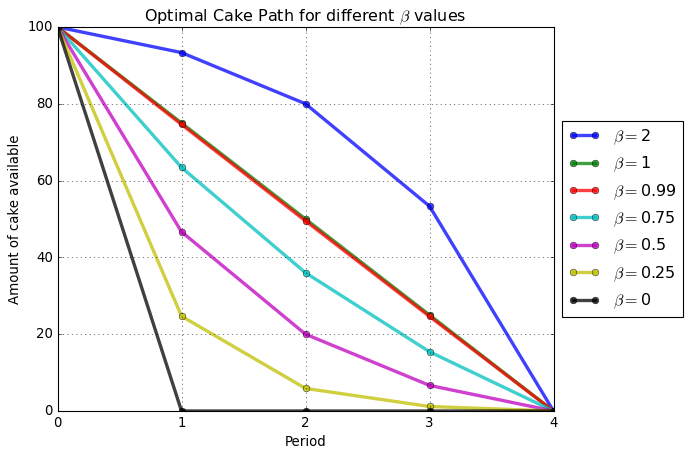

In [3]:
# Create a variable called 'cake0' that stores the initial quantity of cake. NOT PROVIDED
cake0=100

# Plot optimal path of cake for the different values of beta. NOT PROVIDED
for beta in [2,1, 0.99, 0.75, 0.5, 0.25, 0]:
    
    cake,consumption = four_period_cake(beta=beta,cake0=cake0)
    plt.plot(cake,'o-',lw=3,alpha=0.75,label='$\\beta=$'+str(beta))
    
plt.title('Optimal Cake Path for different $\\beta$ values')
plt.xlabel('Period')
plt.ylabel('Amount of cake available')
plt.xticks(range(len(cake)))

# Put a legend to the right of the current axis. NOT PROVIDED
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid()

### Part (c)

Suppose that the initial quantity of cake is $K_0 = 100$. For $\beta = 0, 0.25, 0.5, 0.75, 0.99, 1, 2$, plot the optimal path for cake consumption for periods 0 through 3. Add labels to the plot command so you know which line corresponds to which value of $\beta$.

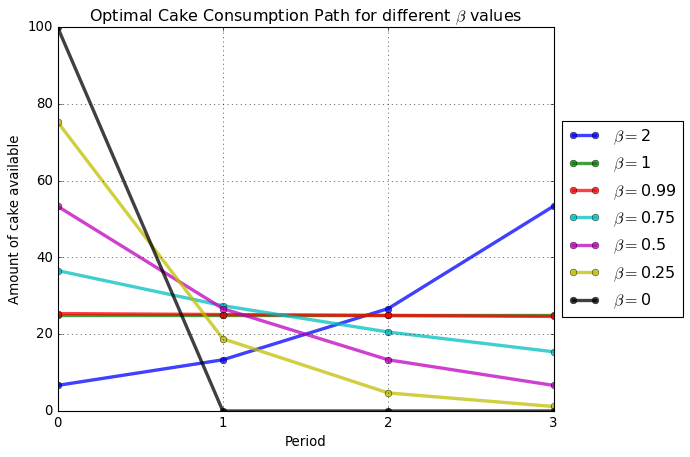

In [4]:
# Create a variable called 'cake0' that stores the initial quantity of cake. NOT PROVIDED
cake0=100

# Plot optimal path of cake for the different values of beta. NOT PROVIDED
for beta in [2,1, 0.99, 0.75, 0.5, 0.25, 0]:
    
    cake,consumption = four_period_cake(beta=beta,cake0=cake0)
    plt.plot(consumption,'o-',lw=3,alpha=0.75,label='$\\beta=$'+str(beta))
    
plt.title('Optimal Cake Consumption Path for different $\\beta$ values')
plt.xlabel('Period')
plt.ylabel('Amount of cake available')
plt.xticks(range(len(consumption)))

# Put a legend to the right of the current axis. NOT PROVIDED
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid()

### Part (d)

Suppose that $\beta=0.95$. For $K_0 = 1, 10, 20, 50$, plot the optimal path for the quantity of cake for periods 0 through 4. Add labels to the plot command so you know which line corresponds to which value of $K_0$.

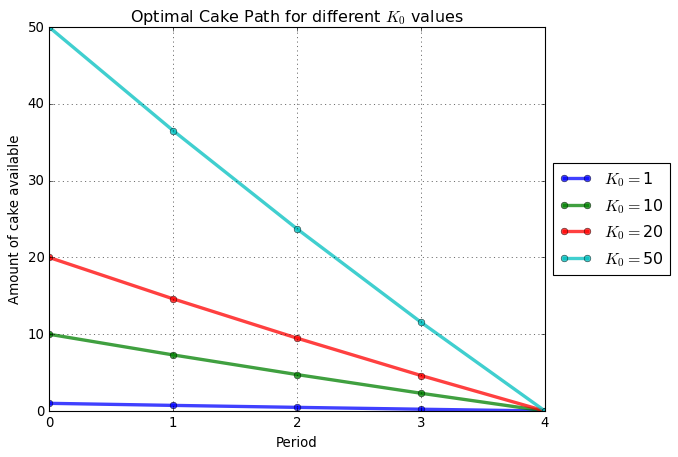

In [5]:
# Create a variable called 'cake0' that stores the initial quantity of cake. NOT PROVIDED
beta=0.95

# Plot optimal path of cake for the different values of beta. NOT PROVIDED
for cake0 in [1,10,20,50]:
    
    cake,consumption = four_period_cake(beta=beta,cake0=cake0)
    plt.plot(cake,'o-',lw=3,alpha=0.75,label='$K_0=$'+str(cake0))
    
plt.title('Optimal Cake Path for different $K_0$ values')
plt.xlabel('Period')
plt.ylabel('Amount of cake available')
plt.xticks(range(len(cake)))

# Put a legend to the right of the current axis. NOT PROVIDED
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid()

## Exercise: The Stochastic Solow Growth Model

In class we simulated the stochastic Solow growth model with three endogenous variables: $K_t$, $Y_t$, and $A_t$. Now, reconsider the model with two additional variables, consumption $C_t$ and investment $I_t$, and two additional equations:

\begin{align}
Y_t & = A_t K_t^{\alpha}\\
C_{t} & = (1-s)Y_t\\
Y_{t} & = C_t + I_t\\
K_{t+1} & = sY_t + (1-\delta) K_t\\
\log A_{t+1} & = \rho \log A_t + \epsilon_{t+1} 
\end{align}

where $\epsilon_{t+1} \sim \mathcal{N}(0,\sigma^2)$. In this exercise, you will construct a 401 period (10-year) simulation of the model.

For the other parameter, use the following values for the simulation:

| $$\rho$$ | $$\sigma$$ | $$s$$  | $$\alpha$$ | $$\delta $$ | $$T$$  |
|----------|------------|--------|------------|-------------|--------|
| 0.8      | 0.005      | 0.12   | 0.33       |  0.025      | 401    |

In [15]:
# Create a variable called 'parameters' that is a Pandas Series containing the parameter values for the simulation
parameters = pd.Series(dtype=float)
parameters['rhoa'] = .8
parameters['sigma_squared'] = 0.005**2
parameters['alpha'] = 0.33
parameters['delta'] = 0.025
parameters['s'] = 0.12

# Print the model's parameters
print(parameters)

rhoa             0.800000
sigma_squared    0.000025
alpha            0.330000
delta            0.025000
s                0.120000
dtype: float64


In [16]:
# Create variable called `exo_states` that stores the names of each exogenous state variable.
exo_states = ['a']

# Create variable called `endo_states` that stores the names of each endogenous state variable.
endo_states = ['k']

# Create variable called `costates` that stores the names of the non-predetermined variables.
costates = ['y','c','i']

In [7]:
# Define a function that evaluates the equilibrium conditions. PROVIDED
def equations(variables_forward,variables_current,parameters):
    
    # Parameters. PROVIDED
    p = parameters
    
    # Current variables. PROVIDED
    cur = variables_current
    
    # Forward variables. PROVIDED
    fwd = variables_forward
    
    # Production function
    prod_fn = cur.a*cur.k**p.alpha - cur.y
    
    # Capital evolution
    capital_evolution = p.s*cur.a*cur.k**p.alpha + (1 - p.delta)*cur.k - fwd.k
    
    # Consumption function
    consumption_function = (1-p.s)*cur.y - cur.c
    
    # Market clearing
    market_clearing = cur.c + cur.i - cur.y
    
    # Exogenous tfp
    tfp_proc = p.rhoa*np.log(cur.a) - np.log(fwd.a)
    
    # Stack equilibrium conditions into a numpy array
    return np.array([
        prod_fn,
        capital_evolution,
        consumption_function,
        market_clearing,
        tfp_proc
        ])

In [8]:
# Initialize the model
model = ls.model(equations = equations,
                     exo_states=exo_states,
                     endo_states=endo_states,
                     costates=costates,
                     parameters=parameters)

In [9]:
# Compute the steady state numerically using the .compute_ss() method.
guess = [1,4,1,1,1]
model.compute_ss(guess)

In [10]:
# Use the .approximate_and_solve() method to compute the log-linear approximation of the model around the 
# non-stochastic steady state and solve endogenous variables in terms of state variables.
model.approximate_and_solve()

In [11]:
# Use .stoch_sim() method to compute stochastic simulation with the following arguments:
#    1. seed = 126
#    2. T = 401
#    3. covariance_matrix= [[parameters['sigma_squared']]]
model.stoch_sim(seed=126,T=401,covariance_matrix= [parameters['sigma_squared']])

# Print first 10 rows of model.simulated
print(model.simulated.head(10))

        e_a         a         k         y         c         i
0  0.004957  0.004322 -0.006090  0.002313  0.002313  0.002313
1 -0.003912 -0.000454 -0.005880 -0.002394 -0.002394 -0.002394
2 -0.005351 -0.005714 -0.005793 -0.007626 -0.007626 -0.007626
3 -0.005894 -0.010466 -0.005839 -0.012393 -0.012393 -0.012393
4  0.006251 -0.002121 -0.006003 -0.004102 -0.004102 -0.004102
5 -0.005705 -0.007402 -0.005955 -0.009368 -0.009368 -0.009368
6  0.004203 -0.001719 -0.006040 -0.003712 -0.003712 -0.003712
7  0.002422  0.001047 -0.005982 -0.000927 -0.000927 -0.000927
8 -0.004314 -0.003476 -0.005856 -0.005409 -0.005409 -0.005409
9  0.000444 -0.002337 -0.005845 -0.004266 -0.004266 -0.004266


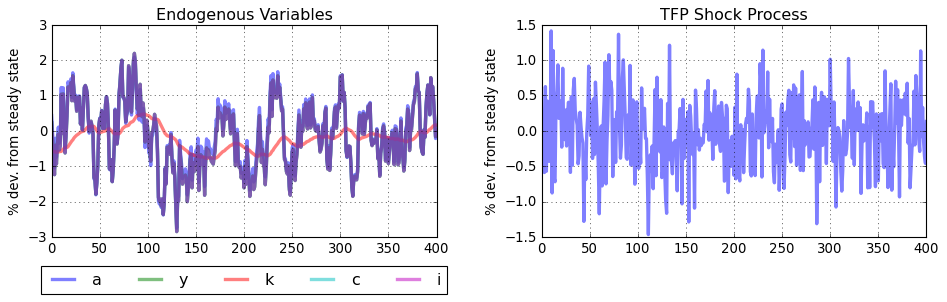

In [12]:
# Plot the computed stochastic simulation results. Creae two axes side-by-side.
#     1. Left axes: plot: a, k, i, y, c
#     1. Right axes: plot: shock to TFP
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(1,2,1)
(model.simulated[['a','y','k','c','i']]*100).plot(lw=3,alpha=0.5,grid=True,ax = ax1).legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5)
ax1.set_title('Endogenous Variables')
ax1.set_ylabel('% dev. from steady state')

ax2 = fig.add_subplot(1,2,2)
(model.simulated[['e_a']]*100).plot(lw=3,alpha=0.5,grid=True,ax = ax2,legend=False)
ax2.set_title('TFP Shock Process')
ax2.set_ylabel('% dev. from steady state')

fig.tight_layout()

In [13]:
# Compute standard deviations of simulated TFP, output, consumption, investment, and capital
model.simulated[['a','y','c','i','k']].std()

a    0.008921
y    0.009169
c    0.009169
i    0.009169
k    0.003041
dtype: float64

In [14]:
# Compute correlation coefficients of simulated TFP, output, consumption, investment, and capital
model.simulated[['a','y','c','i','k']].corr()

,a,y,c,i,k
a,1.000000,0.994217,0.994217,0.994217,0.193594
y,0.994217,1.000000,1.000000,1.000000,0.297829
c,0.994217,1.000000,1.000000,1.000000,0.297829
i,0.994217,1.000000,1.000000,1.000000,0.297829
k,0.193594,0.297829,0.297829,0.297829,1.000000


**Questions** 

1. In the data simulated from the stochastic Solow growth model, which variables appear to be perfectly correlated?
2. Refer to the Notebook from the class on "Introduction to Business Cycle Data." Compared with the actual correlations, does the stochastic Solow growth model under- or overpredict the correlation between output and consumption over the cycle? What about the correlation between output and investment?

**Answers**

1. Output, investment, and consumption appear to be perfectly correlated. <!-- answer -->
2. The stochastic Solow model *overpredicts* the correlation between output and consumption. The stochastic Solow model also *overpredicts* the correlation between output and investment. <!-- answer -->